<a href="https://colab.research.google.com/github/mnaqeeb06/AI-Lab-Work/blob/main/Lab_5_Activities_and_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Activity and Task 23th Oct**
## Lab 5
> Muhammad Naqeeb

> fa20-bcs-012

> To: Mr. Qazi Zia

## **Lab Task 1:**
Imagine going from Arad to Bucharest in the following map. Your goal is to minimize the distance 
mentioned in the map during your travel. Implement a iterative deepening search to find the 
corresponding path.
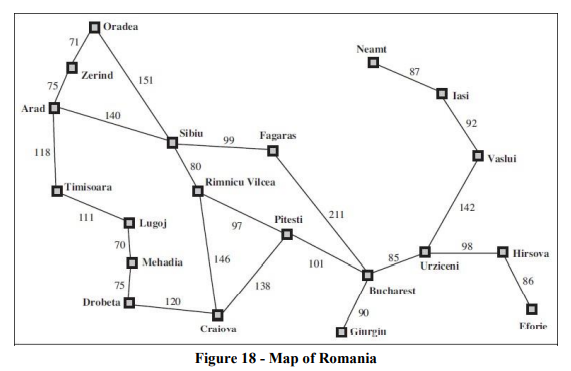

In [19]:
class Problem(object):

    """The abstract class for a formal problem. You should subclass
    this and implement the methods actions and result, and possibly
    __init__, goal_test, and path_cost. Then you will create instances
    of your subclass and solve them with the various search functions."""

    def __init__(self, initial, goal=None):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        raise NotImplementedError

    def result(self, state, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError

    def goal_test(self, state):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        if isinstance(self.goal, list):
            return is_in(state, self.goal)
        else:
            return state == self.goal

    def path_cost(self, c, state1, action, state2):
        """Return the cost of a solution path that arrives at state2 from
        state1 via action, assuming cost c to get up to state1. If the problem
        is such that the path doesn't matter, this function will only look at
        state2.  If the path does matter, it will consider c and maybe state1
        and action. The default method costs 1 for every step in the path."""
        return c + 1

    def value(self, state):
        """For optimization problems, each state has a value.  Hill-climbing
        and related algorithms try to maximize this value."""
        raise NotImplementedError

class Node:

    """A node in a search tree. Contains a pointer to the parent (the node
    that this is a successor of) and to the actual state for this node. Note
    that if a state is arrived at by two paths, then there are two nodes with
    the same state.  Also includes the action that got us to this state, and
    the total path_cost (also known as g) to reach the node.  Other functions
    may add an f and h value; see best_first_graph_search and astar_search for
    an explanation of how the f and h values are handled. You will not need to
    subclass this class."""

    def __init__(self, state, parent=None, action=None, path_cost=0):
        """Create a search tree Node, derived from a parent by an action."""
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    def __repr__(self):
        return "<Node {}>".format(self.state)

    def __lt__(self, node):
        return self.state < node.state

    def expand(self, problem):
        """List the nodes reachable in one step from this node."""
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        """[Figure 3.10]"""
        next_state = problem.result(self.state, action)
        next_node = Node(next_state, self, action,
                    problem.path_cost(self.path_cost, self.state,
                                      action, next_state))
        return next_node
    
    def solution(self):
        """Return the sequence of actions to go from the root to this node."""
        return [node.action for node in self.path()[1:]]

    def path(self):
        """Return a list of nodes forming the path from the root to this node."""
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))

    # We want for a queue of nodes in breadth_first_graph_search or
    # astar_search to have no duplicated states, so we treat nodes
    # with the same state as equal. [Problem: this may not be what you
    # want in other contexts.]

    def __eq__(self, other):
        return isinstance(other, Node) and self.state == other.state

    def __hash__(self):
        return hash(self.state)


romania_map = (dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

romania_map = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))


def depth_limited_search_for_vis(problem):
    """Search the deepest nodes in the search tree first."""
    iterations, all_node_colors, node = depth_limited_search_graph(problem)
    return(iterations, all_node_colors, node)

def iterative_deepening_search_for_vis(problem):
    for depth in range(sys.maxsize):
        iterations, all_node_colors, node=depth_limited_search_for_vis(problem)
        if iterations:
            return (iterations, all_node_colors, node)

all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=iterative_deepening_search_for_vis, 
               problem=romania_problem)

## **Lab Task 2:**
Generate a list of possible words from a character matrix
Given a 8 × 8 boggle board, find a list of all possible words that can 
be formed by a sequence of adjacent characters on the board.
We are allowed to search a word in all eight possible directions, i.e., 
North, West, South, East, North-East, North-West, South-East, 
South-West, but a word should not have multiple instances of the 
same cell.

Consider the following the traditional 4 × 4 boggle board. If the 
input dictionary is [START, NOTE, SAND, STONED], the valid words are [NOTE, SAND, STONED]. With iterative deepening, create words of length 5, 6, 7 and 8 
through each iteration.

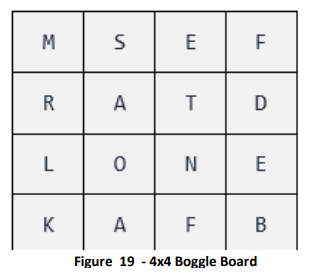

In [ ]:
# Generate a list of possible words from a character matrix
# Given an M × N boggle board, find a list of all possible words that can be formed 
# by a sequence of adjacent characters on the board.
# We are allowed to search a word in all eight possible directions, 
# i.e., North, West, South, East, NorthEast, North-West, South-East, South-West


# A class to store a Trie node
class Trie:
    # Constructor
    def __init__(self):
        self.character = {}
        self.isLeaf = False  # true when the node is a leaf node
 
 
# Iterative function to insert a string into a Trie
def insert(root, s):
    # start from the root node
    curr = root
 
    for ch in s:
        # go to the next node (create if the path doesn't exist)
        curr = curr.character.setdefault(ch, Trie())
 
    curr.isLeaf = True
 
 
# Below lists detail all eight possible movements from a cell
# (top, right, bottom, left, and four diagonal moves)
row = [-1, -1, -1, 0, 1, 0, 1, 1]
col = [-1, 1, 0, -1, -1, 1, 0, 1]
 
 
# The function returns false if (x, y) is not valid matrix coordinates
# or cell (x, y) is already processed or doesn't lead to the solution
def isSafe(x, y, processed, board, ch):
    return (0 <= x < len(processed)) and (0 <= y < len(processed[0])) and \
           not processed[x][y] and (board[x][y] == ch)
 
 
# A recursive function to search valid words present in a boggle using trie
def searchBoggle(root, board, i, j, processed, path, result):
    # if a leaf node is encountered
    if root.isLeaf:
        # update result with the current word
        result.add(path)
 
    # mark the current cell as processed
    processed[i][j] = True
 
    # traverse all children of the current Trie node
    for key, value in root.character.items():
 
        # check for all eight possible movements from the current cell
        for k in range(len(row)):
 
            # skip if a cell is invalid, or it is already processed
            # or doesn't lead to any path in the Trie
            if isSafe(i + row[k], j + col[k], processed, board, key):
                searchBoggle(value, board, i + row[k], j + col[k],
                             processed, path + key, result)
 
    # backtrack: mark the current cell as unprocessed
    processed[i][j] = False
 
 
# Function to search for a given set of words in a boggle
def searchInBoggle(board, words):
    # construct a set for storing the result
    result = set()
 
    # base case
    if not board or not len(board):
        return
 
    # insert all words into a trie
    root = Trie()
    for word in words:
        insert(root, word)
 
    # `M × N` board
    (M, N) = (len(board), len(board[0]))
 
    # construct a matrix to store whether a cell is processed or not
    processed = [[False for x in range(N)] for y in range(M)]
 
    # consider each character in the matrix
    for i in range(M):
        for j in range(N):
            ch = board[i][j]  # current character
 
            # proceed only if the current character is a child of the Trie root node
            if ch in root.character:
                searchBoggle(root.character[ch], board, i, j, processed, ch, result)
 
    # return the result set
    return result
 
 
if __name__ == '__main__':
    board = [
        ['M', 'S', 'E', 'F'],
        ['R', 'A', 'T', 'D'],
        ['L', 'O', 'N', 'E'],
        ['K', 'A', 'F', 'B']
    ]
 
    words = ['START', 'NOTE', 'SAND', 'STONED']
    searchInBoggle(board, words)
 
    validWords = searchInBoggle(board, words)
    print(validWords)
 


{'NOTE', 'STONED', 'SAND'}
